<a href="https://colab.research.google.com/github/LiamJHowarth/Financial_Analytics/blob/main/CAPM_%26_Asset_Pricing_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CAPM & Asset Pricing Theory**

In the early 20th century, modern finance began to take shape, driven not by complexity for its own sake, but by a sharper focus on one core question: How do we fairly price risk?
If assets were truly risk-free, there would be no need for portfolio managers, analysts, or investment banks. Most of finance as we know it would simply not exist.
Yet risk is unavoidable. Some of it can be reduced through diversification: company-specific shocks, earnings misses, or management scandals often wash out in a broad portfolio. But systematic risk, the exposure to economy-wide forces like recessions, inflation, and interest rate shifts, cannot be diversified away.

**Investors must be paid to bear that risk.**

That simple but profound idea led to the Capital Asset Pricing Model (CAPM). Developed in the 1960s by William Sharpe, John Lintner, and Jan Mossin, CAPM gave the world its first clear, testable answer to a question markets had wrestled with for decades:



> What return should an investor require for taking on a specific amount of systematic risk?



With one formula, CAPM transformed how we think about risk and return. It remains a foundational tool in valuation, cost of capital calculations, and portfolio management more than half a century later.

### 1. Generating Hypothetical Data for CAPM

To visualize the CAPM model, we need hypothetical data for:
- **Market Returns (Rm)**: The returns of the overall market.
- **Risk-Free Rate (Rf)**: The return of a risk-free investment (e.g., U.S. Treasury bills).
- **Individual Asset Returns (Ri)**: The returns for specific assets.

We'll simulate these over a period of time.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Number of periods (e.g., months)
num_periods = 60 # 5 years of monthly data

# Generate hypothetical market returns
market_returns = np.random.normal(0.01, 0.03, num_periods) # Mean 1% per month, std dev 3%

# Generate a hypothetical risk-free rate (constant for simplicity)
risk_free_rate = 0.002 # 0.2% per month (approx 2.4% annually)

# Generate hypothetical asset returns with different betas and some noise
asset_names = ['Utility Co.', 'NuScale.', 'Tesla']
betas = [1.0, 0.7, 1.8, 1.3] # Adjusted hypothetical betas for new asset mix

asset_returns = pd.DataFrame(index=range(num_periods))

for i, name in enumerate(asset_names):
    # Ri = Rf + Beta * (Rm - Rf) + error
    # For simulation, we'll generate returns with an inherent relationship to market returns
    # and add some asset-specific noise.
    noise = np.random.normal(0, 0.015, num_periods) # Asset-specific risk (epsilon)
    # Simulating returns based on a simplified model for illustrative purposes
    asset_returns[name] = risk_free_rate + betas[i] * (market_returns - risk_free_rate) + noise

# Combine all data into a DataFrame
data = pd.DataFrame({
    'Market_Returns': market_returns,
    'Risk_Free_Rate': risk_free_rate
})
data = pd.concat([data, asset_returns], axis=1)

print("Hypothetical Data Head:")
display(data.head())


Hypothetical Data Head:


,Market_Returns,Risk_Free_Rate,Utility Co.,NuScale.,Tesla
0,0.024901,0.002,0.017714,0.029896,0.052608
1,0.005852,0.002,0.003067,-0.008944,-0.003924
2,0.029431,0.002,0.012836,0.042243,0.035312
3,0.055691,0.002,0.037748,0.018556,0.105881
4,0.002975,0.002,0.015163,0.011486,0.000404


### 2. Calculating Beta for Each Asset

Beta ($\beta$) measures an asset's volatility in relation to the overall market. It's calculated as the covariance between the asset's returns and the market's returns, divided by the variance of the market's returns:

$$\beta_i = \frac{\text{Cov}(R_i, R_m)}{\text{Var}(R_m)}$$

A beta of 1 means the asset moves with the market. A beta greater than 1 means it's more volatile than the market, and less than 1 means it's less volatile.

In [5]:
# Calculate Beta for each asset
calculated_betas = {}
for asset in asset_names:
    covariance = data[asset].cov(data['Market_Returns'])
    market_variance = data['Market_Returns'].var()
    beta = covariance / market_variance
    calculated_betas[asset] = beta

# Convert to DataFrame for better display and format to 2 decimal places
b_df = pd.DataFrame.from_dict(calculated_betas, orient='index', columns=['Calculated Beta'])
print("Calculated Betas:")
display(b_df.style.format("{:.2f}"))


Calculated Betas:


,Calculated Beta
Market Index,1.04
Utility Co.,0.76
Nuclear Power Inc.,1.88
Tech Innovators,1.23


### 3. Calculating Expected Return using CAPM

The Capital Asset Pricing Model (CAPM) formula is:

$$E(R_i) = R_f + \beta_i \cdot (E(R_m) - R_f)$$

Where:
- $E(R_i)$: Expected return of the asset
- $R_f$: Risk-free rate
- $\beta_i$: Beta of the asset
- $E(R_m)$: Expected return of the market

For our visualization, we'll use the average historical market return from our hypothetical data as $E(R_m)$.

In [6]:
# Calculate expected market return (average of historical market returns)
expected_market_return = data['Market_Returns'].mean()

# Calculate expected return for each asset using CAPM
expected_returns_capm = {}
for asset, beta in calculated_betas.items():
    expected_return = risk_free_rate + beta * (expected_market_return - risk_free_rate)
    expected_returns_capm[asset] = expected_return

# Convert to DataFrame for better display and format to 2 decimal places
er_df = pd.DataFrame.from_dict(expected_returns_capm, orient='index', columns=['Expected Return (CAPM)'])
print("Expected Returns (CAPM):")
display(er_df.style.format("{:.2%}")) # Format as percentage with 2 decimal places


Expected Returns (CAPM):


,Expected Return (CAPM)
Market Index,0.55%
Utility Co.,0.46%
Nuclear Power Inc.,0.83%
Tech Innovators,0.61%


### 4. Visualising the Security Market Line (SML)

The Security Market Line (SML) is a graphical representation of the CAPM. It plots the expected return of an asset against its beta. All fairly priced assets should lie on the SML.

We will plot:
- The SML itself.
- Each hypothetical asset based on its calculated beta and CAPM-derived expected return.

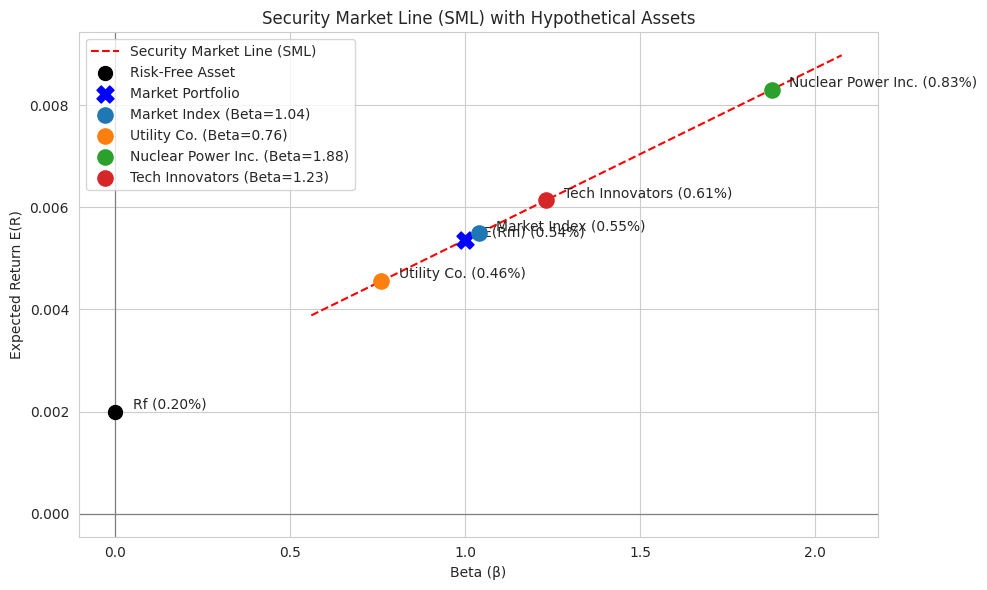

In [15]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Define a range of betas for the SML line
sml_betas = np.linspace(min(calculated_betas.values()) - 0.2, max(calculated_betas.values()) + 0.2, 100)

# Calculate expected returns for the SML line
sml_expected_returns = risk_free_rate + sml_betas * (expected_market_return - risk_free_rate)

# Plot the SML
plt.plot(sml_betas, sml_expected_returns, color='red', linestyle='--', label='Security Market Line (SML)')

# Plot the risk-free asset (Beta=0, Return=Rf)
plt.scatter(0, risk_free_rate, color='black', marker='o', s=100, zorder=5, label='Risk-Free Asset')
plt.text(0 + 0.05, risk_free_rate, f'Rf ({risk_free_rate:.2%})', verticalalignment='bottom')

# Plot the market portfolio (Beta=1, Return=E(Rm))
plt.scatter(1, expected_market_return, color='blue', marker='X', s=150, zorder=5, label='Market Portfolio')
plt.text(1 + 0.05, expected_market_return, f'E(Rm) ({expected_market_return:.2%})', verticalalignment='bottom')

# Plot each hypothetical asset
for asset, beta in calculated_betas.items():
    er = expected_returns_capm[asset]
    plt.scatter(beta, er, s=120, label=f'{asset} (Beta={beta:.2f})', zorder=5)
    plt.text(beta + 0.05, er, f'{asset} ({er:.2%})', verticalalignment='bottom')

plt.title('Security Market Line (SML) with Hypothetical Assets')
plt.xlabel('Beta (β)')
plt.ylabel('Expected Return E(R)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='gray', linestyle='-', linewidth=0.9)
plt.axvline(0, color='gray', linestyle='-', linewidth=0.9)
plt.tight_layout()
plt.show()
